In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sklearn.__version__

'1.2.2'

In [2]:
address= pd.read_csv("C:\\Users\\TOJMARK LTD\\DATA SCIENCE COURCES\\KPMG VIRTUAL PROJECT\KPMG DATA Address.csv")
demography= pd.read_csv("C:\\Users\\TOJMARK LTD\\DATA SCIENCE COURCES\\KPMG VIRTUAL PROJECT\KPMG DATA demography.csv", encoding='ISO-8859-1')
transaction= pd.read_csv("C:\\Users\\TOJMARK LTD\\DATA SCIENCE COURCES\\KPMG VIRTUAL PROJECT\KPMG DATA transaction.csv")

In [3]:
address.head()

,customer_id,address,postcode,state,country,property_valuation,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,0 Holy Cross Court,4211,QLD,Australia,9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,9 Oakridge Court,3216,VIC,Australia,9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
demography.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,140,11,462,1/1/2017,False,Approved,Giant Bicycles,Standard,high,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,517,77,311,1/1/2017,True,Approved,WeareA2B,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,561,65,2298,1/1/2017,False,Approved,WeareA2B,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1293,67,1931,1/1/2017,True,Approved,Norco Bicycles,Road,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1403,0,2891,1/1/2017,True,Approved,OHM Cycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# PHASE 1: Data Cleaning Phase

In [6]:
# Drop unnamed columns: We need to drop all the unanmed columns in the datasets 
address = address.loc[:, ~address.columns.str.startswith('Unnamed')]
transaction = transaction.loc[:, ~transaction.columns.str.startswith('Unnamed')]
demography = demography.loc[:, ~demography.columns.str.startswith('Unnamed')]

In [7]:
print(address.head())
print(transaction.head())
print(demography.head())

   customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   
2            4   0 Holy Cross Court      4211              QLD  Australia   
3            5  17979 Del Mar Point      2448  New South Wales  Australia   
4            6     9 Oakridge Court      3216              VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9  
   transaction_id  product_id  customer_id transaction_date online_order  \
0             140          11          462         1/1/2017        False   
1             517          77          311         1/1/2017         True   
2             561          65         2298         1/1/2017        False   
3            1293          67         1931         1/1/2017         True   
4            

# Handling Missing Values

In [8]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [9]:
transaction.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [10]:
transaction.dropna(subset=['standard_cost'], inplace=True)
# Reset the index of the DataFrame after removing rows
transaction.reset_index(drop=True, inplace=True)
transaction.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               358
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost                0
product_first_sold_date      0
dtype: int64

In [11]:
demography.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [12]:
demography = demography.drop(columns=['default'])

In [13]:
print(demography.isna().sum())
print(address.isna().sum())
print(transaction.isna().sum())

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               358
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list

I droped all the missing values in all of the datasets for data qualities and better insights

# Merging The Datasets Together

In [14]:
# Let merge demographic data with address data
customer_data = demography.merge(address, on='customer_id')

# Let erge the resulting customer data with transaction data
customer_data = customer_data.merge(transaction, on='customer_id')

In [15]:
#Let check for any missing values again
customer_data.isna().sum()

customer_id                               0
first_name                                0
last_name                               638
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     438
job_title                              2350
job_industry_category                  3192
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                  438
address                                   0
postcode                                  0
state                                     0
country                                   0
property_valuation                        0
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            357
order_status                              0
brand                           

# Handling Duplications

In [16]:
# Let heck for duplicate customer IDs in the customer_data dataset
duplicate_ids = customer_data['customer_id'].duplicated(keep=False)

# let filter the dataset to show only duplicate IDs
duplicate_customers = customer_data[duplicate_ids]

# Let display the duplicate customer IDs
print(duplicate_customers['customer_id'])

0         720
1         720
2         720
3         720
4         720
         ... 
19768    3365
19769    3473
19770    3473
19771    3473
19772    3473
Name: customer_id, Length: 19718, dtype: int64


In [17]:
# Let remove duplicate rows based on 'customer_id'
customer_data = customer_data.drop_duplicates(subset='customer_id', keep='first')

# Reset the index after removing duplicates
customer_data.reset_index(drop=True, inplace=True)

In [18]:
customer_data

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,...,1/3/2017,True,Approved,Trek Bicycles,Mountain,low,medium,574.64,$459.71,38206.0
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,...,1/16/2017,True,Approved,Trek Bicycles,Standard,medium,medium,499.53,$388.72,36334.0
2,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,...,2/1/2017,True,Approved,Norco Bicycles,Standard,medium,small,586.45,$521.94,33429.0
3,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,...,3/20/2017,True,Approved,Solex,Standard,low,medium,1289.85,$74.51,39915.0
4,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,...,1/6/2017,False,Approved,Giant Bicycles,Standard,high,medium,1129.13,$677.48,33549.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,3312,Franky,Nanninini,U,49,NaN,Administrative Officer,IT,High Net Worth,N,...,1/25/2017,True,Approved,OHM Cycles,Standard,medium,medium,235.63,$125.07,38206.0
3485,3322,Hew,Sworder,U,24,NaN,Financial Analyst,Financial Services,Affluent Customer,N,...,1/21/2017,False,Approved,Giant Bicycles,Standard,high,medium,1179.00,$707.40,36367.0
3486,3343,Cristabel,Bim,U,3,NaN,Recruiter,IT,Mass Customer,N,...,1/20/2017,True,Approved,Norco Bicycles,Mountain,low,small,688.63,$612.88,33455.0
3487,3365,Karlens,Chaffyn,U,29,NaN,Engineer III,IT,Mass Customer,N,...,1/5/2017,False,Approved,OHM Cycles,Standard,medium,medium,795.34,$101.58,35470.0


# PHASE 3: FEATURE ENGINEERING PHASE

In [19]:
# Loop through columns and print the number of unique values
for column in customer_data.columns:
    unique_count = customer_data[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'customer_id' has 3489 unique values.
Column 'first_name' has 2835 unique values.
Column 'last_name' has 3263 unique values.
Column 'gender' has 6 unique values.
Column 'past_3_years_bike_related_purchases' has 100 unique values.
Column 'DOB' has 3047 unique values.
Column 'job_title' has 195 unique values.
Column 'job_industry_category' has 9 unique values.
Column 'wealth_segment' has 3 unique values.
Column 'deceased_indicator' has 2 unique values.
Column 'owns_car' has 2 unique values.
Column 'tenure' has 22 unique values.
Column 'address' has 3487 unique values.
Column 'postcode' has 835 unique values.
Column 'state' has 5 unique values.
Column 'country' has 1 unique values.
Column 'property_valuation' has 12 unique values.
Column 'transaction_id' has 3489 unique values.
Column 'product_id' has 101 unique values.
Column 'transaction_date' has 281 unique values.
Column 'online_order' has 2 unique values.
Column 'order_status' has 2 unique values.
Column 'brand' has 6 unique v

In [20]:
#We need to change the gender 4 unque values to F and M

# Let replace unique values in the 'gender' column
customer_data['gender'].replace({
    'Femal': 'F',   # Replacing 'Femal' with 'F'
    'F': 'F',       # Replacing 'F' with 'F' (in case it's already 'F')
    'U': 'Unknown', # Replacing 'U' with 'Unknown' or any other desired value
    'Male': 'M',
    'Female': 'F',
    # Replace 'M' with 'M' (in case it's already 'M')
}, inplace=True)

# Verify the changes
print(customer_data['gender'].unique())

['M' 'F' 'Unknown']


In [21]:
# Let remove dollar sign and commas from the standard_cost column
customer_data['standard_cost'] = customer_data['standard_cost'].str.replace('$', '').str.replace(',', '').astype(float)

# Check the first few rows to verify the changes
print(customer_data['standard_cost'].head())

0    459.71
1    388.72
2    521.94
3     74.51
4    677.48
Name: standard_cost, dtype: float64


C:\Users\TOJMARK LTD\AppData\Local\Temp\ipykernel_21288\2100971371.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  customer_data['standard_cost'] = customer_data['standard_cost'].str.replace('$', '').str.replace(',', '').astype(float)


In [22]:
# Now, calculate profit
customer_data['profit'] = customer_data['list_price'] - customer_data['standard_cost']
customer_data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,720,Darrel,Canet,M,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,...,True,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,38206.0,114.93
1,1092,Katlin,Creddon,F,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,...,True,Approved,Trek Bicycles,Standard,medium,medium,499.53,388.72,36334.0,110.81
2,3410,Merrili,Brittin,F,93,1940-09-22,NaN,Property,Mass Customer,N,...,True,Approved,Norco Bicycles,Standard,medium,small,586.45,521.94,33429.0,64.51
3,2413,Abbey,Murrow,M,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,...,True,Approved,Solex,Standard,low,medium,1289.85,74.51,39915.0,1215.34
4,658,Donn,Bonnell,M,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,...,False,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,33549.0,451.65


# Age Grouping

In [23]:
# Convert DOB column to datetime
customer_data['DOB'] = pd.to_datetime(customer_data['DOB'])

# let calculate age from DOB and store it in a new column
customer_data['age'] = (pd.Timestamp.now() - customer_data['DOB']).astype('<m8[Y]')

# Define age group bins and labels
age_bins = [0, 19, 29, 39, 49, 59, 69, 100]  # Define your age group bins as needed
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']  # Corresponding age group labels

# Create the age group column based on age and bins
customer_data['age_group'] = pd.cut(customer_data['age'], bins=age_bins, labels=age_labels, right=False)

In [24]:
customer_data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,age,age_group
0,720,Darrel,Canet,M,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,...,Trek Bicycles,Mountain,low,medium,574.64,459.71,38206.0,114.93,91.0,70+
1,1092,Katlin,Creddon,F,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,...,Trek Bicycles,Standard,medium,medium,499.53,388.72,36334.0,110.81,88.0,70+
2,3410,Merrili,Brittin,F,93,1940-09-22,NaN,Property,Mass Customer,N,...,Norco Bicycles,Standard,medium,small,586.45,521.94,33429.0,64.51,83.0,70+
3,2413,Abbey,Murrow,M,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,...,Solex,Standard,low,medium,1289.85,74.51,39915.0,1215.34,80.0,70+
4,658,Donn,Bonnell,M,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,...,Giant Bicycles,Standard,high,medium,1129.13,677.48,33549.0,451.65,79.0,70+


# Handling state Values Inconsitencies

In [25]:
# Define a mapping of full state names to abbreviations
state_mapping = {
    'New South Wales': 'NSW',
    'Victoria': 'VIC',
    'Queensland': 'QLD',
    'South Australia': 'SA',
    'Western Australia': 'WA'
}

# Replace the values in the 'state' column with abbreviations
customer_data['state'] = customer_data['state'].replace(state_mapping)

# Check the unique values in the 'state' column to confirm the changes
print(customer_data['state'].unique())

['NSW' 'VIC' 'QLD']


In [26]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3489 non-null   int64         
 1   first_name                           3489 non-null   object        
 2   last_name                            3377 non-null   object        
 3   gender                               3489 non-null   object        
 4   past_3_years_bike_related_purchases  3489 non-null   int64         
 5   DOB                                  3413 non-null   datetime64[ns]
 6   job_title                            3068 non-null   object        
 7   job_industry_category                2929 non-null   object        
 8   wealth_segment                       3489 non-null   object        
 9   deceased_indicator                   3489 non-null   object        
 10  owns_car    

# PHASE 2: EXPLORATORY DATA ANALYSIS (EDA)

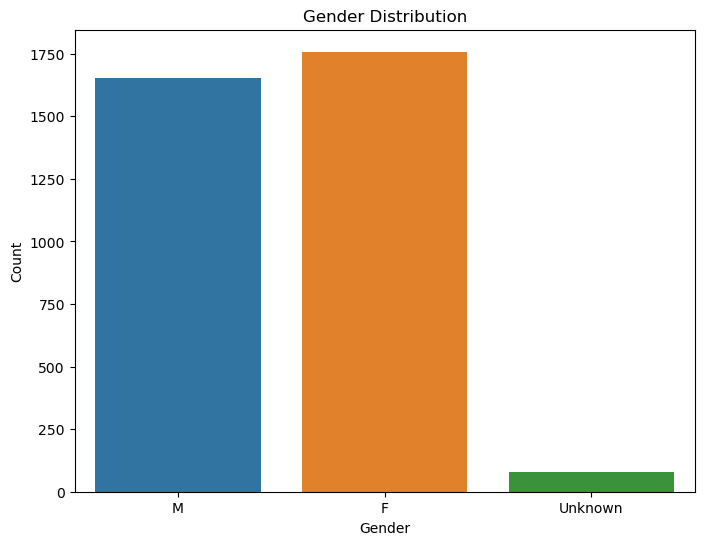

In [27]:
# Ploting gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_data, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [28]:
customer_data['gender']

0             M
1             F
2             F
3             M
4             M
         ...   
3484    Unknown
3485    Unknown
3486    Unknown
3487    Unknown
3488    Unknown
Name: gender, Length: 3489, dtype: object

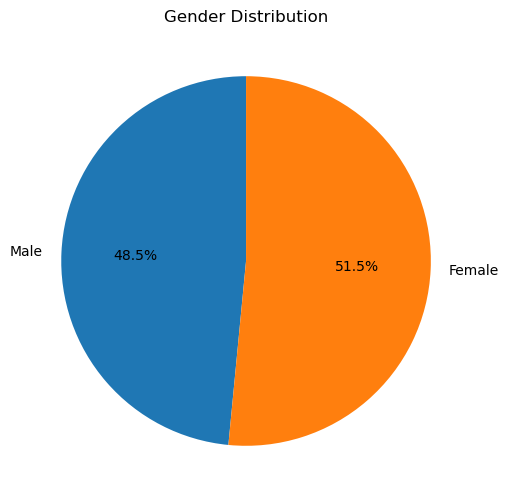

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total number of male and female customers
total_male = (customer_data['gender'] == 'M').sum()
total_female = (customer_data['gender'] == 'F').sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie([total_male, total_female], labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

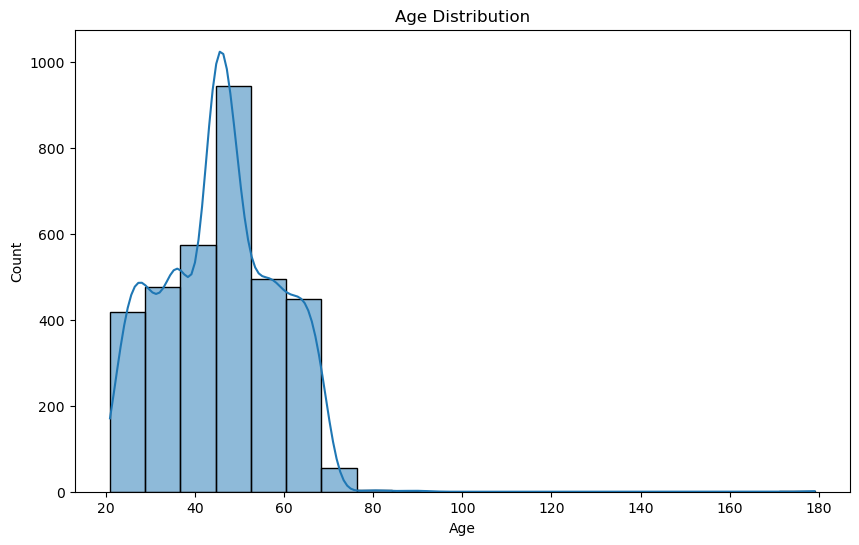

In [30]:
from datetime import datetime

# Convert 'DOB' to datetime
customer_data['DOB'] = pd.to_datetime(customer_data['DOB'], format='%Y-%m-%d', errors='coerce')

# Calculate age from 'DOB'
customer_data['age'] = (datetime.now() - customer_data['DOB']).astype('<m8[Y]')

# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_data, x='age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

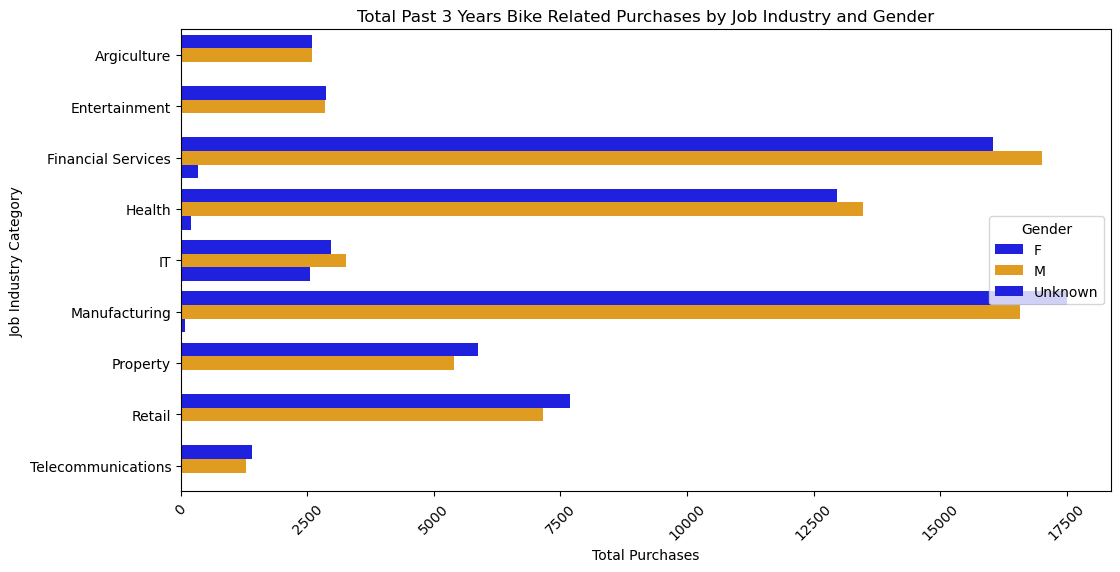

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by job industry category and gender and calculate the sum of past 3 years bike-related purchases
industry_gender_purchase = customer_data.groupby(['job_industry_category', 'gender'])['past_3_years_bike_related_purchases'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=industry_gender_purchase, y='job_industry_category', x='past_3_years_bike_related_purchases', hue='gender', palette=['blue', 'orange'])
plt.title('Total Past 3 Years Bike Related Purchases by Job Industry and Gender')
plt.ylabel('Job Industry Category')
plt.xlabel('Total Purchases')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

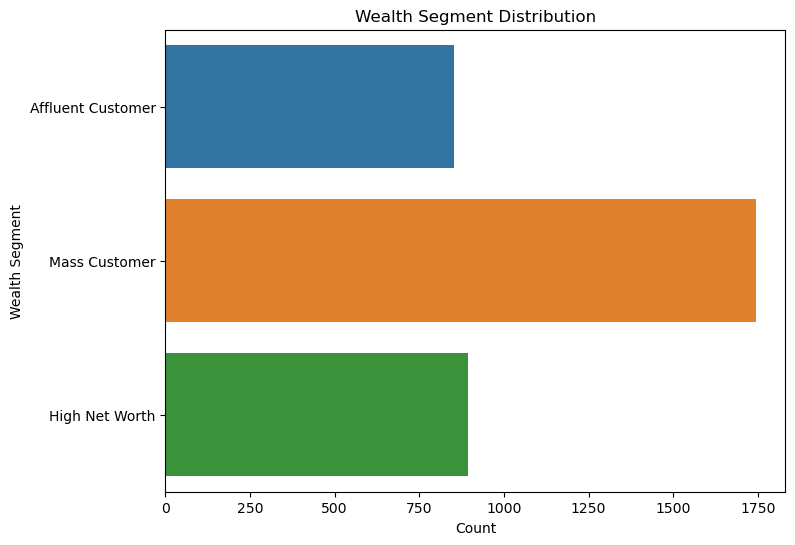

In [32]:
# Plot wealth segment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_data, y='wealth_segment')
plt.title('Wealth Segment Distribution')
plt.xlabel('Count')
plt.ylabel('Wealth Segment')
plt.show()

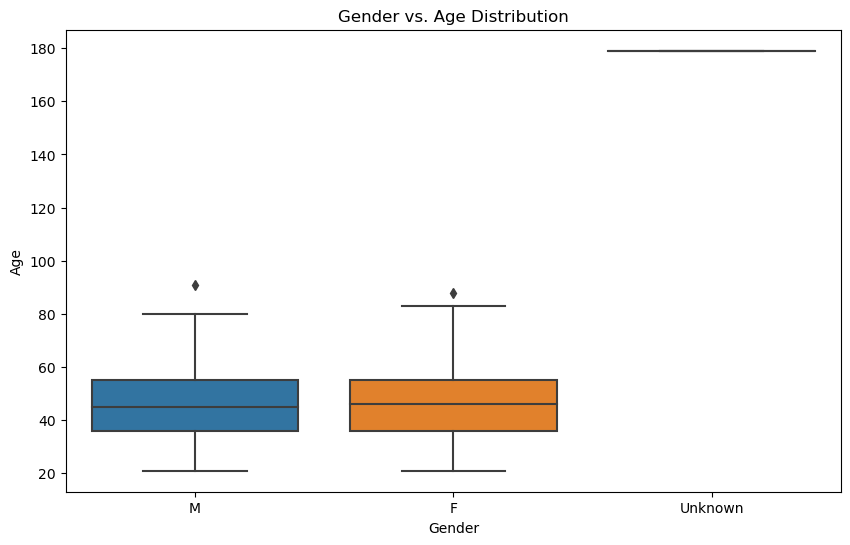

In [33]:
# Plot gender vs. age distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_data, x='gender', y='age')
plt.title('Gender vs. Age Distribution')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

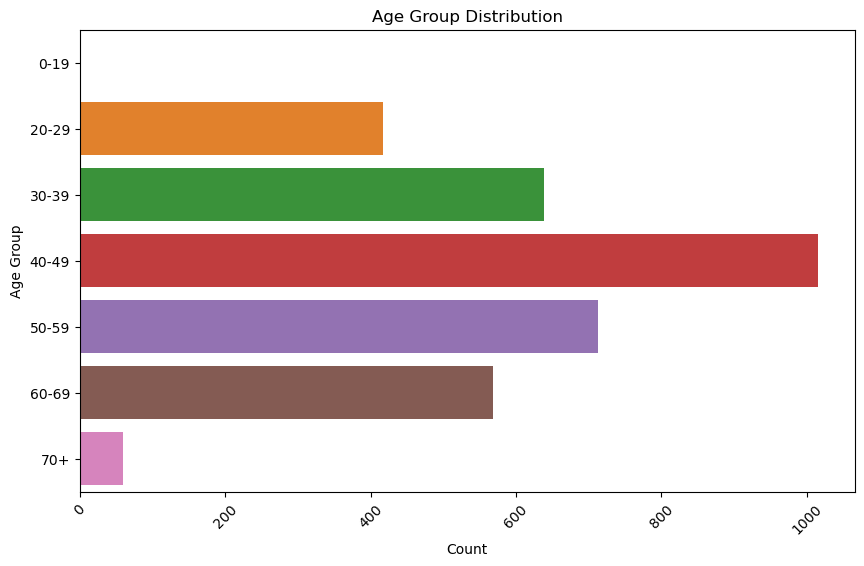

In [34]:
# Plot age group distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data, y='age_group', order=age_labels)
plt.title('Age Group Distribution')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.show()

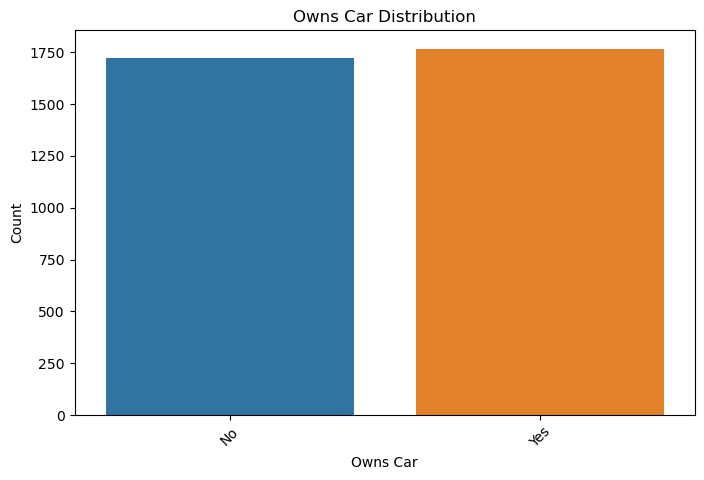

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_data, x='owns_car')
plt.title('Owns Car Distribution')
plt.xlabel('Owns Car')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

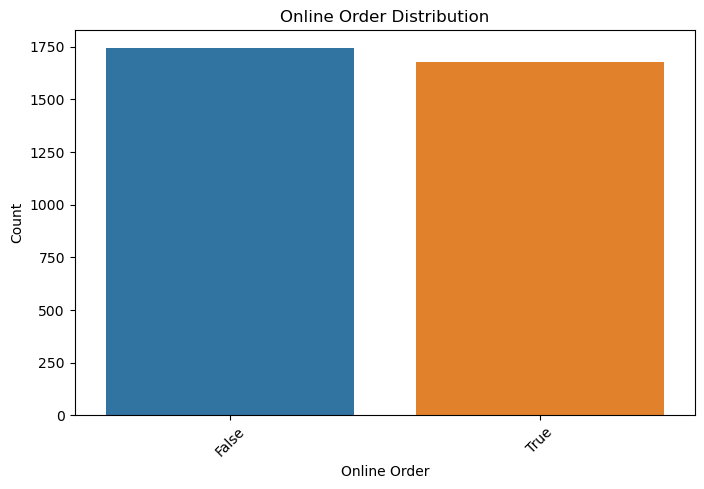

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_data, x='online_order')
plt.title('Online Order Distribution')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

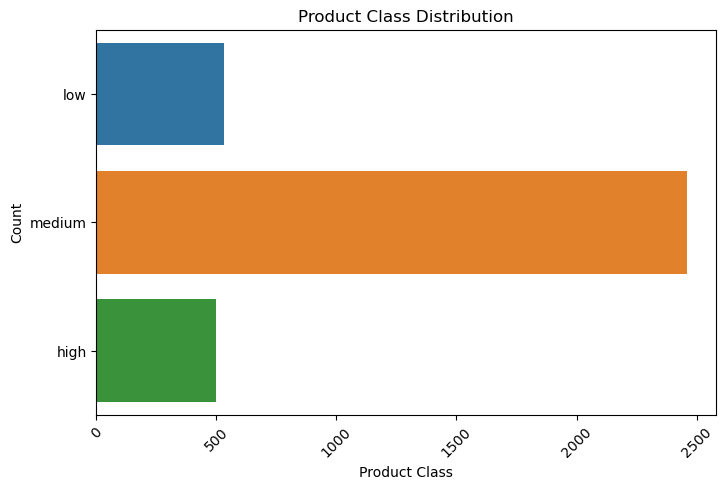

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_data, y='product_class')
plt.title('Product Class Distribution')
plt.xlabel('Product Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

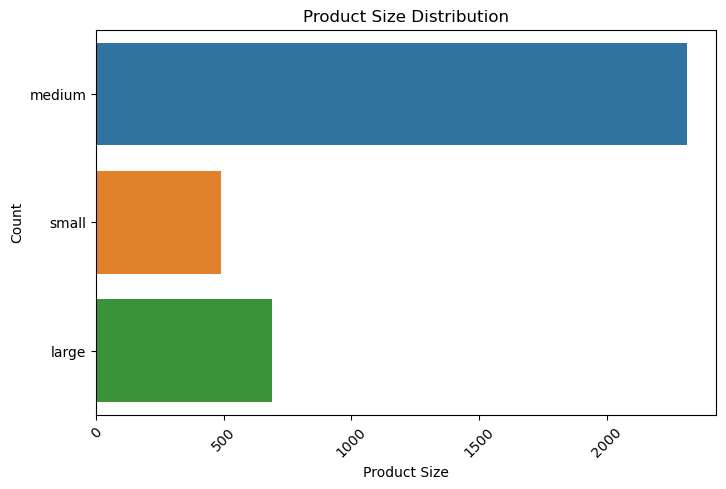

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_data, y='product_size')
plt.title('Product Size Distribution')
plt.xlabel('Product Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

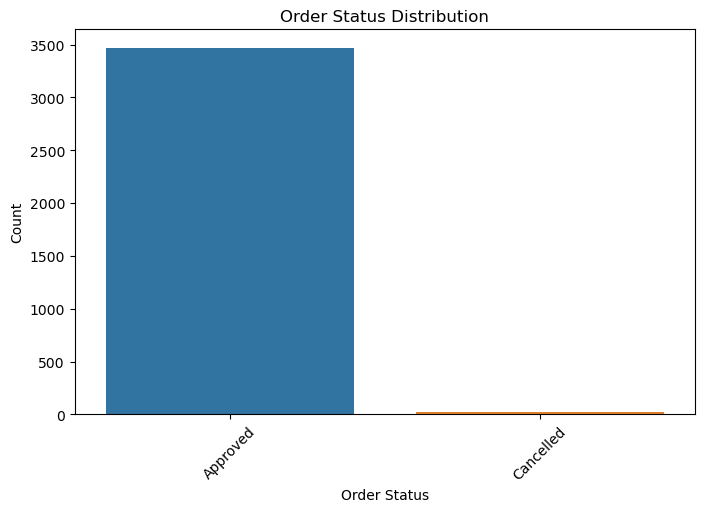

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_data, x='order_status')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

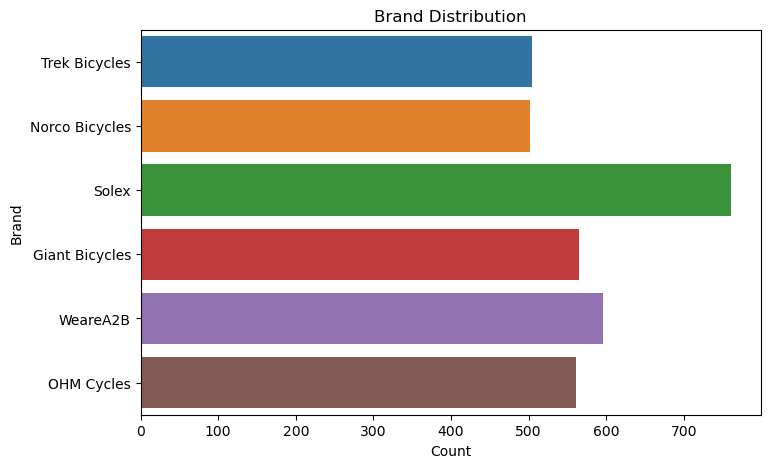

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_data, y='brand')  # Change 'x' to 'y'
plt.title('Brand Distribution')
plt.xlabel('Count') 
plt.ylabel('Brand')  
plt.show()

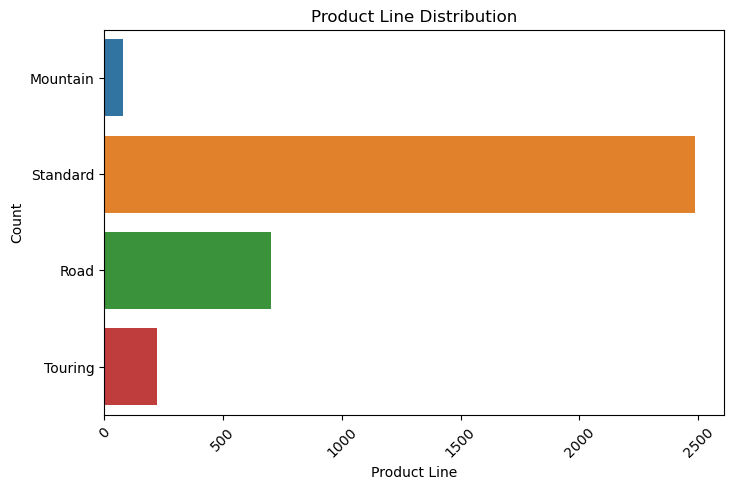

In [41]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_data, y='product_line')
plt.title('Product Line Distribution')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

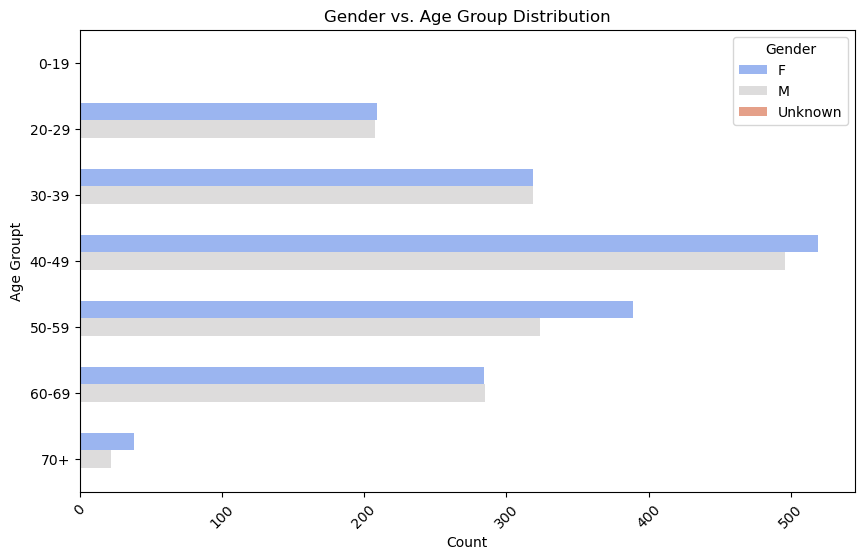

In [42]:
# Group data by gender and age group
gender_age_group = customer_data.groupby(['gender', 'age_group']).size().reset_index(name='count')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_age_group, y='age_group', x='count', hue='gender', palette='coolwarm')
plt.title('Gender vs. Age Group Distribution')
plt.xlabel('Count')
plt.ylabel('Age Groupt')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

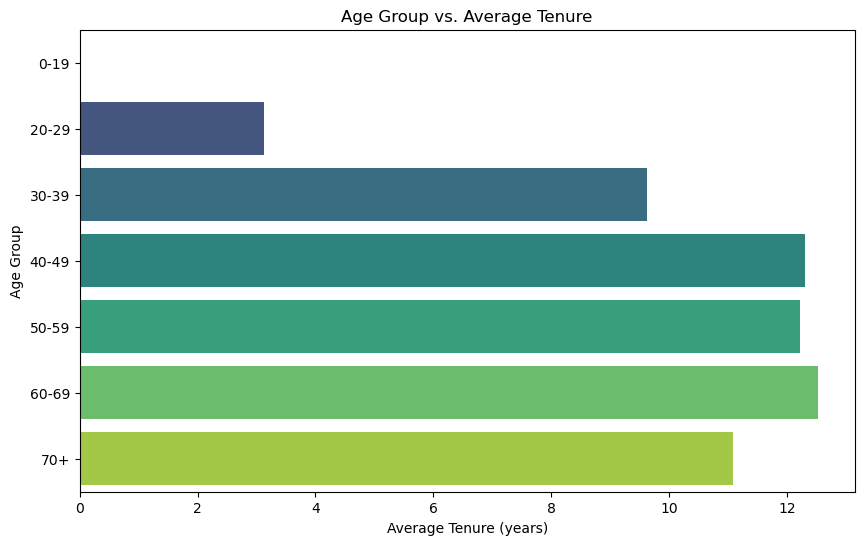

In [43]:
# Group by age group and calculate average tenure
age_group_tenure = customer_data.groupby('age_group')['tenure'].mean().reset_index()

# Plot the average tenure by age group
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_tenure, y='age_group', x='tenure', palette='viridis')
plt.title('Age Group vs. Average Tenure')
plt.ylabel('Age Group')
plt.xlabel('Average Tenure (years)')
plt.xticks(rotation=0)
plt.show()

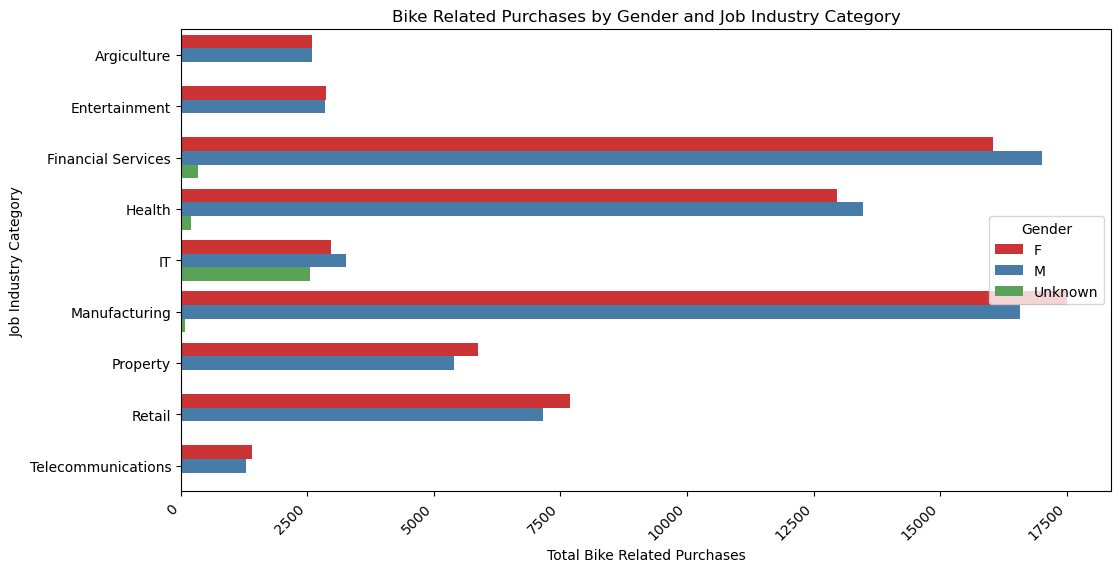

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by gender and job industry category
gender_job_purchase = customer_data.groupby(['gender', 'job_industry_category'])['past_3_years_bike_related_purchases'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=gender_job_purchase, y='job_industry_category', x='past_3_years_bike_related_purchases', hue='gender', palette='Set1')
plt.title('Bike Related Purchases by Gender and Job Industry Category')
plt.xlabel('Total Bike Related Purchases')
plt.ylabel('Job Industry Category')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()

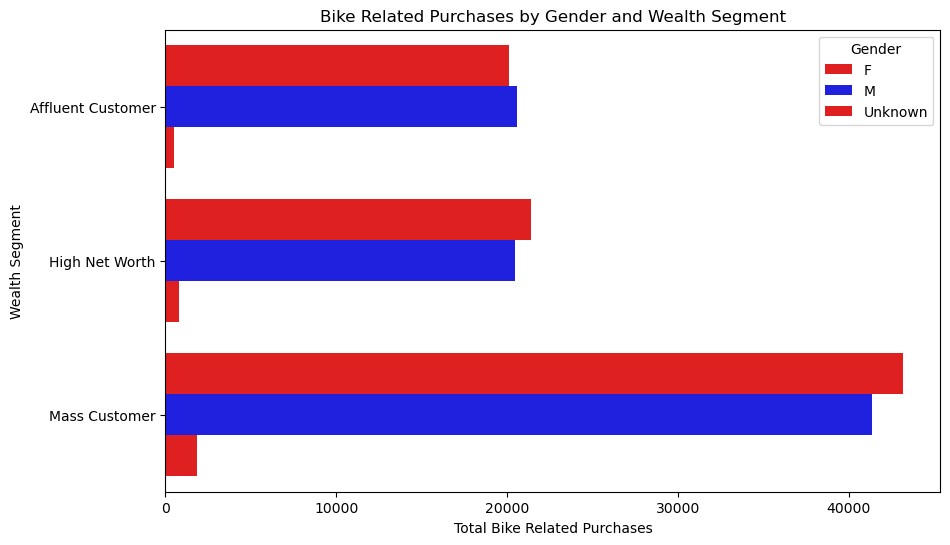

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by gender and wealth segment
gender_wealth_purchase = customer_data.groupby(['gender', 'wealth_segment'])['past_3_years_bike_related_purchases'].sum().reset_index()

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_wealth_purchase, x='past_3_years_bike_related_purchases', y='wealth_segment', hue='gender', palette=['red', 'blue'])
plt.title('Bike Related Purchases by Gender and Wealth Segment')
plt.xlabel('Total Bike Related Purchases')
plt.ylabel('Wealth Segment')
plt.legend(title='Gender')
plt.show()

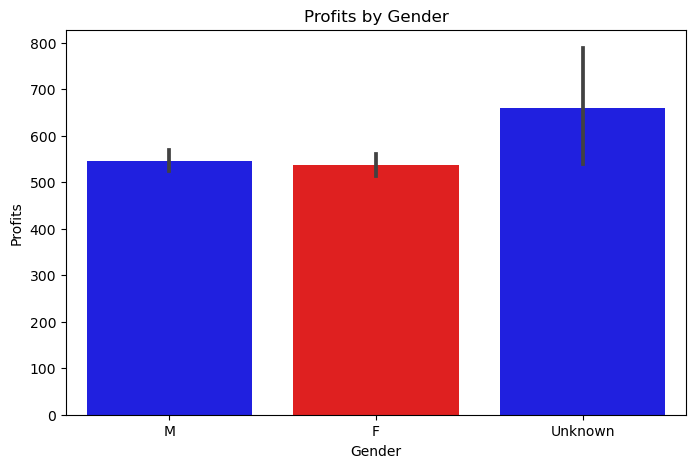

In [46]:
# Create a bar plot for profits by gender
plt.figure(figsize=(8, 5))
sns.barplot(data=customer_data, x='gender', y='profit', palette=['blue', 'red'])
plt.title('Profits by Gender')
plt.xlabel('Gender')
plt.ylabel('Profits')
plt.show()

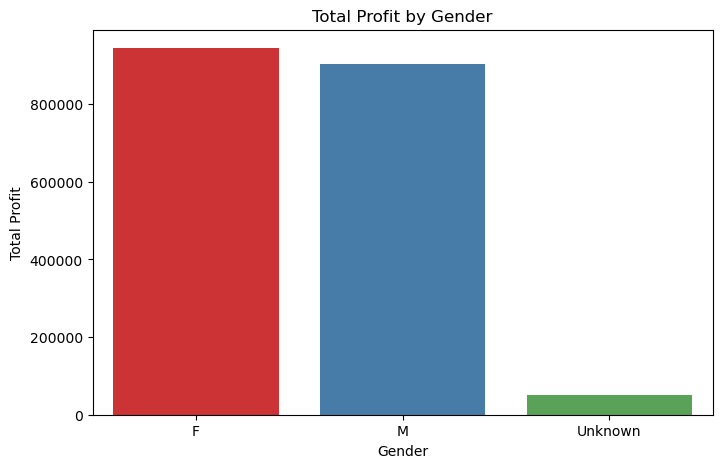

In [47]:
# Calculate profit
customer_data['profit'] = customer_data['list_price'] - customer_data['standard_cost']

# Group data by gender and calculate total profit
profit_by_gender = customer_data.groupby('gender')['profit'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=profit_by_gender, x='gender', y='profit', palette='Set1')
plt.title('Total Profit by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Profit')
plt.show()

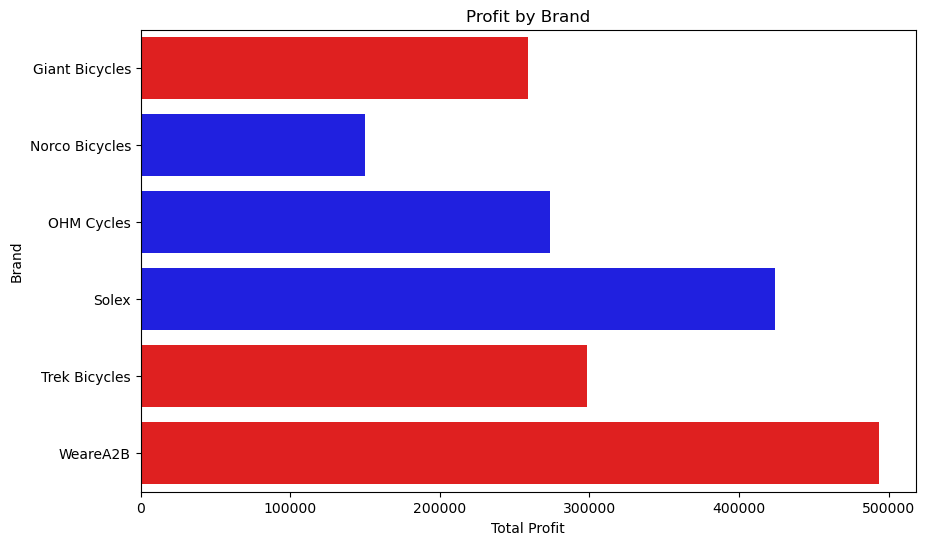

In [48]:
# Calculate profit for each brand
customer_data['profit'] = customer_data['list_price'] - customer_data['standard_cost']

# Group data by brand and calculate total profit
brand_profit = customer_data.groupby('brand')['profit'].sum().reset_index()

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=brand_profit, x='profit', y='brand', palette={'Solex': 'blue', 'WeareA2B': 'red', 'OHM Cycles': 'blue', 'Trek Bicycles': 'red', 'Norco Bicycles': 'blue', 'Giant Bicycles': 'red'})
plt.title('Profit by Brand')
plt.xlabel('Total Profit')
plt.ylabel('Brand')
plt.show()

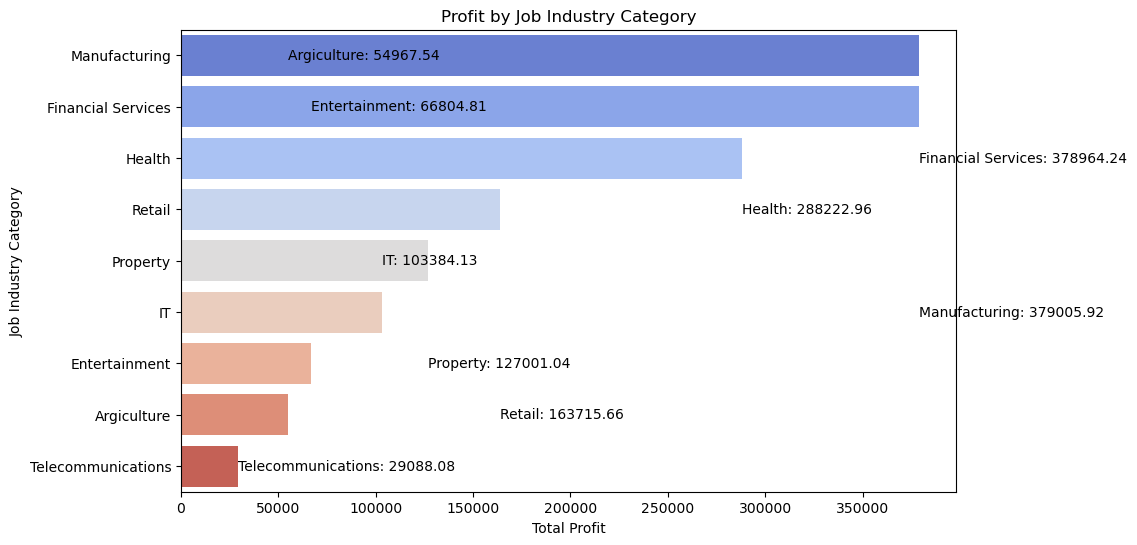

In [49]:
# Calculate profit for each row
customer_data['profit'] = customer_data['list_price'] - customer_data['standard_cost']

# Group data by job industry category and calculate total profit
industry_profit = customer_data.groupby('job_industry_category')['profit'].sum().reset_index()

# Sort the data in descending order by profit
industry_profit = industry_profit.sort_values(by='profit', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=industry_profit, x='profit', y='job_industry_category', palette='coolwarm')
plt.title('Profit by Job Industry Category')
plt.xlabel('Total Profit')
plt.ylabel('Job Industry Category')

# Add labels with total profits to the right of the bars
for index, row in industry_profit.iterrows():
    plt.text(row['profit'], index, f'{row["job_industry_category"]}: {row["profit"]:.2f}', va='center', ha='left')

plt.show()

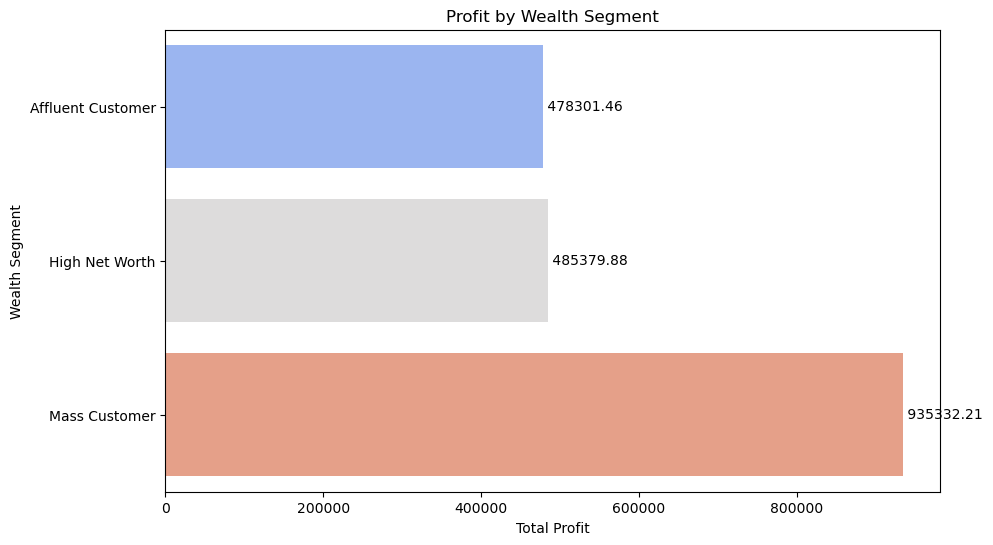

In [50]:
# Calculate profit for each row
customer_data['profit'] = customer_data['list_price'] - customer_data['standard_cost']

# Group data by wealth segment and calculate total profit
wealth_profit = customer_data.groupby('wealth_segment')['profit'].sum().reset_index()

# Sort the data in ascending order by profit
wealth_profit = wealth_profit.sort_values(by='profit', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=wealth_profit, x='profit', y='wealth_segment', palette='coolwarm')
plt.title('Profit by Wealth Segment')
plt.xlabel('Total Profit')
plt.ylabel('Wealth Segment')

# Add labels with total profits
for index, row in wealth_profit.iterrows():
    ax.text(row['profit'], index, f' {row["profit"]:.2f}', va='center')

plt.show()

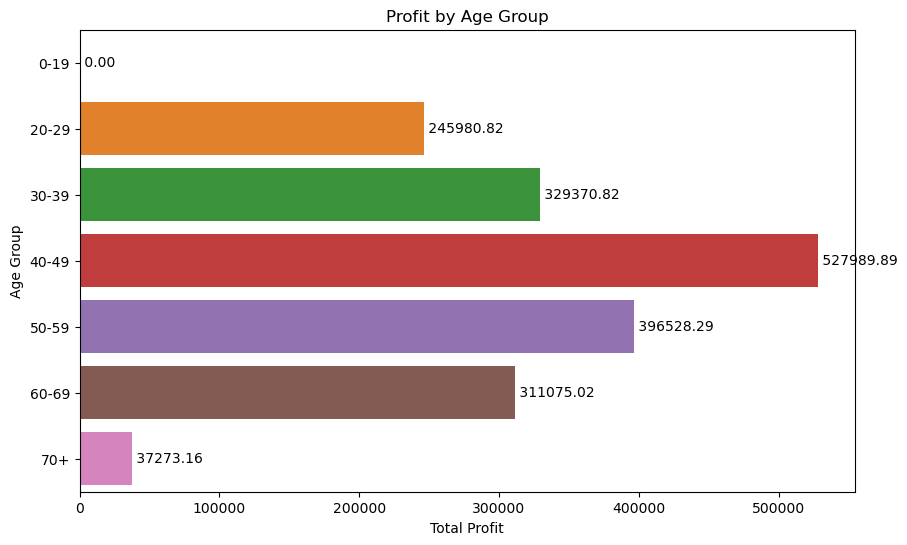

In [51]:
# Group data by age group and calculate total profit
age_profit = customer_data.groupby('age_group')['profit'].sum().reset_index()

# Sort the data in ascending order by profit
age_profit = age_profit.sort_values(by='profit', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=age_profit, x='profit', y='age_group')
plt.title('Profit by Age Group')
plt.xlabel('Total Profit')
plt.ylabel('Age Group')

# Add labels with total profits
for index, row in age_profit.iterrows():
    ax.text(row['profit'], index, f' {row["profit"]:.2f}', va='center')

plt.show()

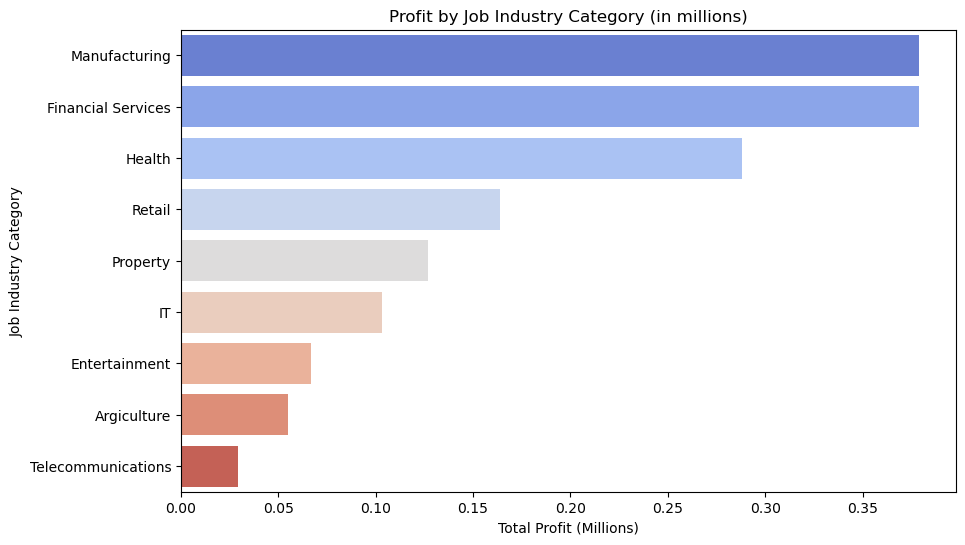

In [52]:
# Calculate profit for each row
customer_data['profit'] = customer_data['list_price'] - customer_data['standard_cost']

# Group data by job industry category and calculate total profit
industry_profit = customer_data.groupby('job_industry_category')['profit'].sum().reset_index()

# Sort the data in descending order by profit
industry_profit = industry_profit.sort_values(by='profit', ascending=False)

# Convert profit to millions
industry_profit['profit_millions'] = industry_profit['profit'] / 1000000

# Create a horizontal bar plot with different colors for each industry
plt.figure(figsize=(10, 6))
sns.barplot(data=industry_profit, x='profit_millions', y='job_industry_category' ,  palette='coolwarm')
plt.title('Profit by Job Industry Category (in millions)')
plt.xlabel('Total Profit (Millions)')
plt.ylabel('Job Industry Category')


plt.show()

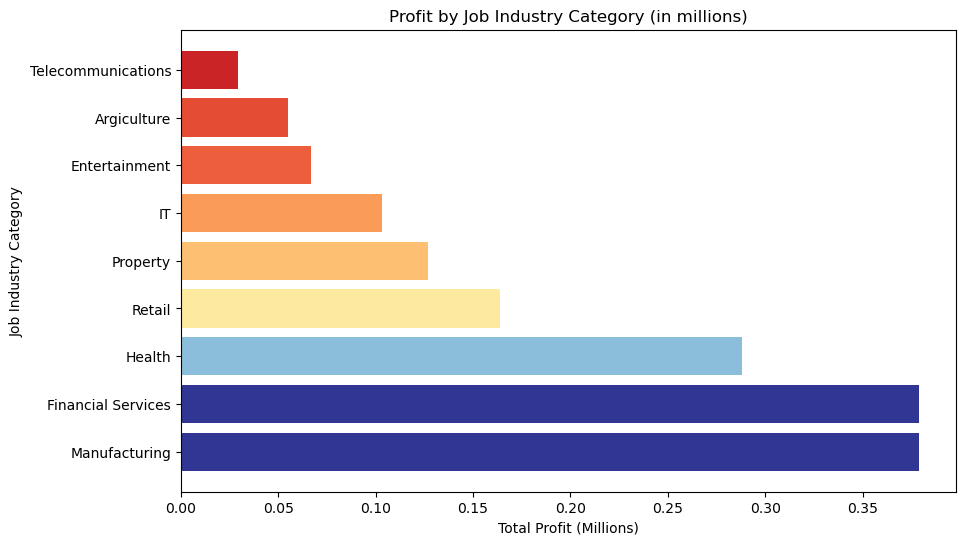

In [53]:
import matplotlib.colors as mcolors

# Create a custom color palette based on profit in millions
profit_millions = industry_profit['profit_millions']
colors = plt.cm.RdYlBu(profit_millions / profit_millions.max())  # Adjust the color map to your preference

# Create a horizontal bar plot with custom colors
plt.figure(figsize=(10, 6))
bars = plt.barh(industry_profit['job_industry_category'], profit_millions, color=colors)
plt.title('Profit by Job Industry Category (in millions)')
plt.xlabel('Total Profit (Millions)')
plt.ylabel('Job Industry Category')


plt.show()

In [54]:
customer_data.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'profit', 'age',
       'age_group'],
      dtype='object')

In [55]:
# Calculate total profit
total_profit = customer_data['profit'].sum()
total_profit

1899013.5500000003

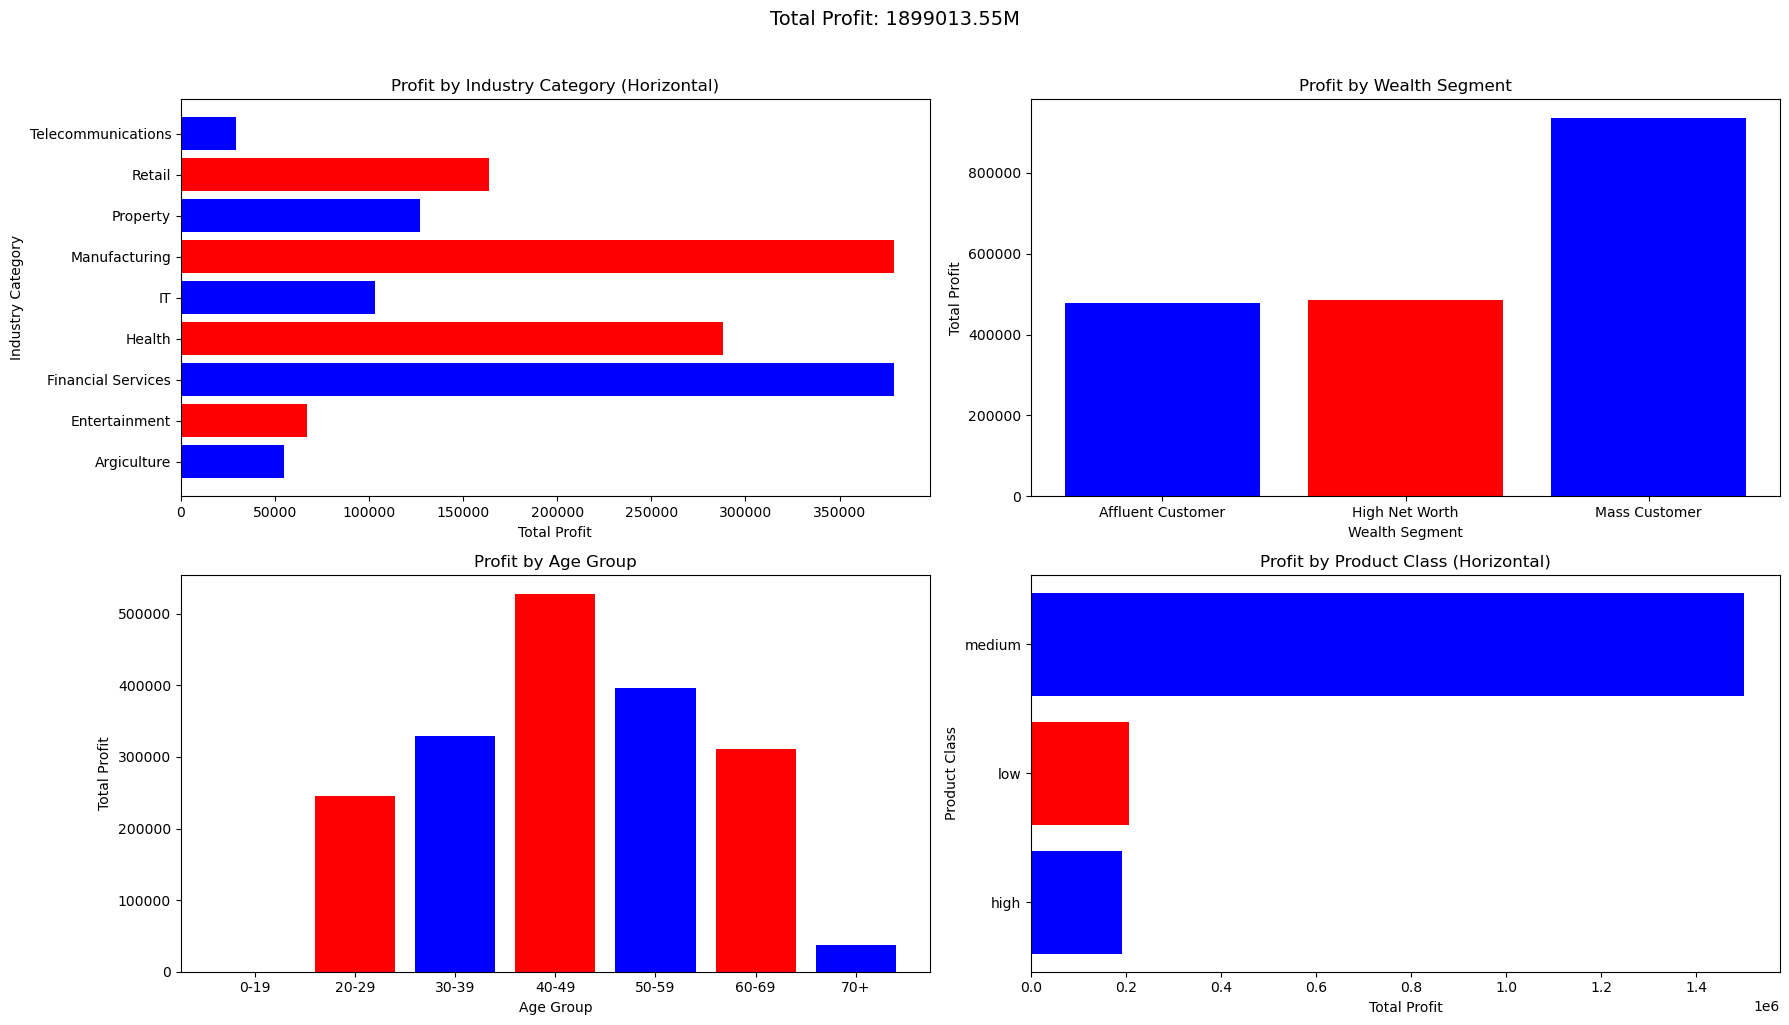

In [56]:
import matplotlib.pyplot as plt

# Calculate total profit
total_profit = customer_data['profit'].sum()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Profit by Industry Category (Horizontal)
profit_by_category = customer_data.groupby('job_industry_category')['profit'].sum().reset_index()
axes[0, 0].barh(profit_by_category['job_industry_category'], profit_by_category['profit'], color=['blue', 'red'])
axes[0, 0].set_title('Profit by Industry Category (Horizontal)')
axes[0, 0].set_xlabel('Total Profit')
axes[0, 0].set_ylabel('Industry Category')

# Profit by Wealth Segment
profit_by_wealth = customer_data.groupby('wealth_segment')['profit'].sum().reset_index()
axes[0, 1].bar(profit_by_wealth['wealth_segment'], profit_by_wealth['profit'], color=['blue', 'red'])
axes[0, 1].set_title('Profit by Wealth Segment')
axes[0, 1].set_xlabel('Wealth Segment')
axes[0, 1].set_ylabel('Total Profit')

# Profit by Age Group
profit_by_age = customer_data.groupby('age_group')['profit'].sum().reset_index()
axes[1, 0].bar(profit_by_age['age_group'], profit_by_age['profit'], color=['blue', 'red'])
axes[1, 0].set_title('Profit by Age Group')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Total Profit')

# Profit by Product Class (Horizontal)
profit_by_product_class = customer_data.groupby('product_class')['profit'].sum().reset_index()
axes[1, 1].barh(profit_by_product_class['product_class'], profit_by_product_class['profit'], color=['blue', 'red'])
axes[1, 1].set_title('Profit by Product Class (Horizontal)')
axes[1, 1].set_xlabel('Total Profit')
axes[1, 1].set_ylabel('Product Class')

# Add a total profit title
fig.suptitle(f'Total Profit: {total_profit:.2f}M', fontsize=14, y=1.02)

# Adjust spacing between subplots
plt.tight_layout()

# Save the plot as an image
plt.savefig('profit_insights.png', bbox_inches='tight')

# Show the plot
plt.show()

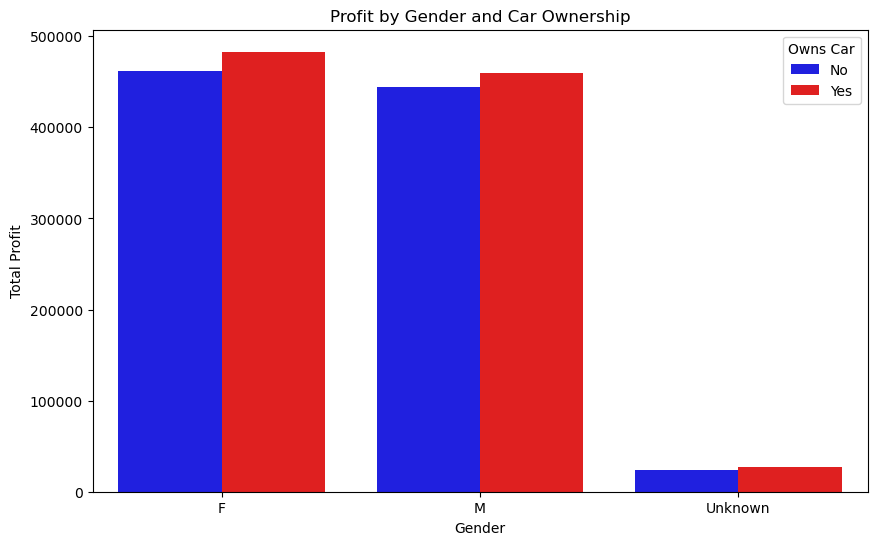

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate profit by gender and car ownership
profit_gender_car = customer_data.groupby(['gender', 'owns_car'])['profit'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=profit_gender_car, x='gender', y='profit', hue='owns_car', palette=['blue', 'red'])
plt.title('Profit by Gender and Car Ownership')
plt.xlabel('Gender')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.legend(title='Owns Car')
plt.show()

# PHASE 3: MODEL DEVELOPMENT

In [58]:
customer_data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,age,age_group
0,720,Darrel,Canet,M,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,...,Trek Bicycles,Mountain,low,medium,574.64,459.71,38206.0,114.93,91.0,70+
1,1092,Katlin,Creddon,F,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,...,Trek Bicycles,Standard,medium,medium,499.53,388.72,36334.0,110.81,88.0,70+
2,3410,Merrili,Brittin,F,93,1940-09-22,NaN,Property,Mass Customer,N,...,Norco Bicycles,Standard,medium,small,586.45,521.94,33429.0,64.51,83.0,70+
3,2413,Abbey,Murrow,M,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,...,Solex,Standard,low,medium,1289.85,74.51,39915.0,1215.34,80.0,70+
4,658,Donn,Bonnell,M,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,...,Giant Bicycles,Standard,high,medium,1129.13,677.48,33549.0,451.65,79.0,70+


In [59]:
# Specify the file path where you want to save the CSV file
file_path = "C:\\Users\\TOJMARK LTD\\DATA SCIENCE PROJECT\\KPMG PROJECT\\CUSTOMER DATA.CSV"

# Export the DataFrame to a CSV file
customer_data.to_csv(file_path, index=False)

# Print a message to confirm the export
print(f"Data exported to {file_path}")

Data exported to C:\Users\TOJMARK LTD\DATA SCIENCE PROJECT\KPMG PROJECT\CUSTOMER DATA.CSV


In [60]:

customer_data['transaction_date'] = pd.to_datetime(customer_data['transaction_date'])
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3489 non-null   int64         
 1   first_name                           3489 non-null   object        
 2   last_name                            3377 non-null   object        
 3   gender                               3489 non-null   object        
 4   past_3_years_bike_related_purchases  3489 non-null   int64         
 5   DOB                                  3413 non-null   datetime64[ns]
 6   job_title                            3068 non-null   object        
 7   job_industry_category                2929 non-null   object        
 8   wealth_segment                       3489 non-null   object        
 9   deceased_indicator                   3489 non-null   object        
 10  owns_car    

In [61]:
customer_data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,age,age_group
0,720,Darrel,Canet,M,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,...,Trek Bicycles,Mountain,low,medium,574.64,459.71,38206.0,114.93,91.0,70+
1,1092,Katlin,Creddon,F,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,...,Trek Bicycles,Standard,medium,medium,499.53,388.72,36334.0,110.81,88.0,70+
2,3410,Merrili,Brittin,F,93,1940-09-22,NaN,Property,Mass Customer,N,...,Norco Bicycles,Standard,medium,small,586.45,521.94,33429.0,64.51,83.0,70+
3,2413,Abbey,Murrow,M,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,...,Solex,Standard,low,medium,1289.85,74.51,39915.0,1215.34,80.0,70+
4,658,Donn,Bonnell,M,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,...,Giant Bicycles,Standard,high,medium,1129.13,677.48,33549.0,451.65,79.0,70+


In [62]:
# Assuming 'customer_data' is your dataset
rfm_data = customer_data.copy()

# Calculate Recency, Frequency, and Monetary (RFM) values
# Assuming you have a 'transaction_date' column in datetime format
current_date = pd.to_datetime('12/30/2017')
rfm_data['Recency'] = (current_date - pd.to_datetime(rfm_data['transaction_date'])).dt.days
rfm_data['Frequency'] = rfm_data.groupby('customer_id')['transaction_id'].transform('count')
rfm_data['Monetary'] = rfm_data['list_price']

# Create RFM Score columns
# Assign RFM scores (you can define your scoring logic)
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], q=4, labels=[4, 3, 2, 1])

# Calculate unique scores for 'Frequency'
unique_freq_scores = pd.qcut(rfm_data['Frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4])
rfm_data['F_Score'] = rfm_data['Frequency'].map(dict(enumerate(unique_freq_scores, 1)))

rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'], q=4, labels=[1, 2, 3, 4])

# Combine RFM scores into one column
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

# Display the RFM data
print(rfm_data.head())


# Segment customers based on RFM scores
def segment_customer(row):
    rfm_score = row['RFM_Score']
    if rfm_score in ['444', '443', '434', '433', '424', '423', '414', '413']:
        return 'High-Value'
    elif rfm_score in ['344', '343', '334', '333', '324', '323', '314', '313']:
        return 'Medium-Value'
    else:
        return 'Low-Value'

rfm_data['Segment'] = rfm_data.apply(segment_customer, axis=1)

# Visualize and analyze the segments
segment_counts = rfm_data['Segment'].value_counts()
print(segment_counts)

   customer_id first_name last_name gender  \
0          720     Darrel     Canet      M   
1         1092     Katlin   Creddon      F   
2         3410    Merrili   Brittin      F   
3         2413      Abbey    Murrow      M   
4          658       Donn   Bonnell      M   

   past_3_years_bike_related_purchases        DOB                 job_title  \
0                                   67 1931-10-23        Recruiting Manager   
1                                   56 1935-08-22        VP Quality Control   
2                                   93 1940-09-22                       NaN   
3                                   27 1943-08-11  Environmental Specialist   
4                                   38 1944-01-24            Tax Accountant   

  job_industry_category     wealth_segment deceased_indicator  ...   profit  \
0                Retail  Affluent Customer                  N  ...   114.93   
1                Retail      Mass Customer                  N  ...   110.81   
2          

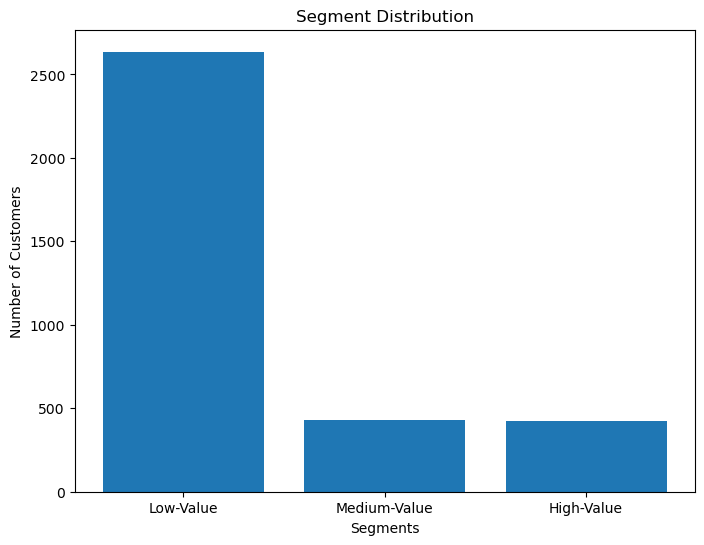

In [63]:
import matplotlib.pyplot as plt

segment_counts = rfm_data['Segment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel('Segments')
plt.ylabel('Number of Customers')
plt.title('Segment Distribution')
plt.show()

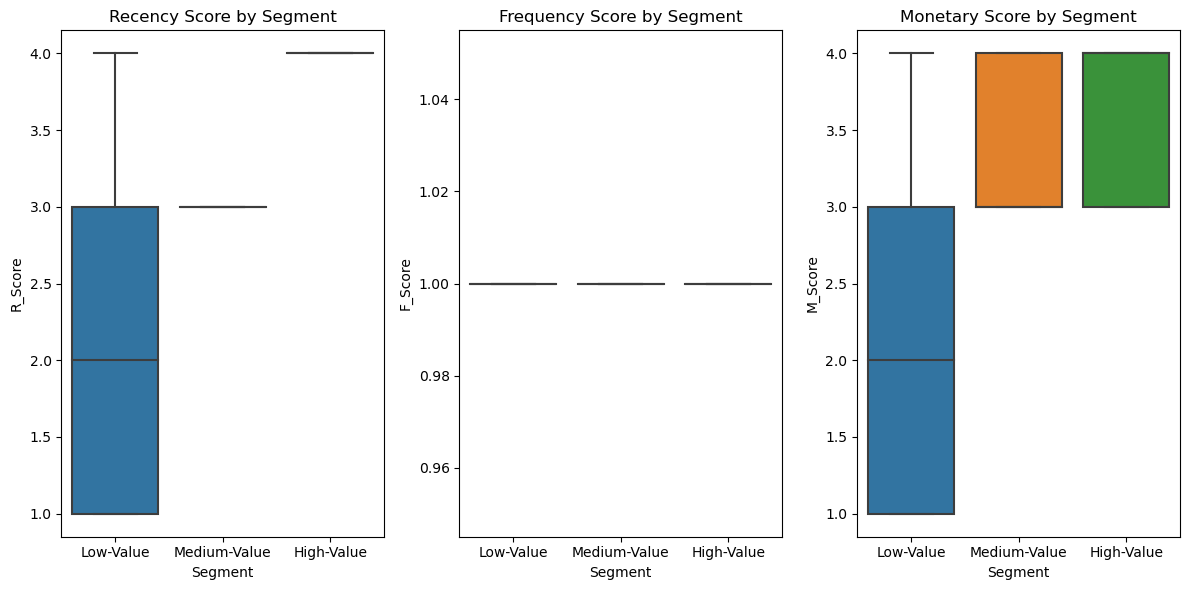

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure RFM scores are treated as numeric
rfm_data['R_Score'] = rfm_data['R_Score'].astype(int)
rfm_data['F_Score'] = rfm_data['F_Score'].astype(int)
rfm_data['M_Score'] = rfm_data['M_Score'].astype(int)

# Create box plots for RFM scores within each segment
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='Segment', y='R_Score', data=rfm_data)
plt.title('Recency Score by Segment')

plt.subplot(1, 3, 2)
sns.boxplot(x='Segment', y='F_Score', data=rfm_data)
plt.title('Frequency Score by Segment')

plt.subplot(1, 3, 3)
sns.boxplot(x='Segment', y='M_Score', data=rfm_data)
plt.title('Monetary Score by Segment')

plt.tight_layout()
plt.show()

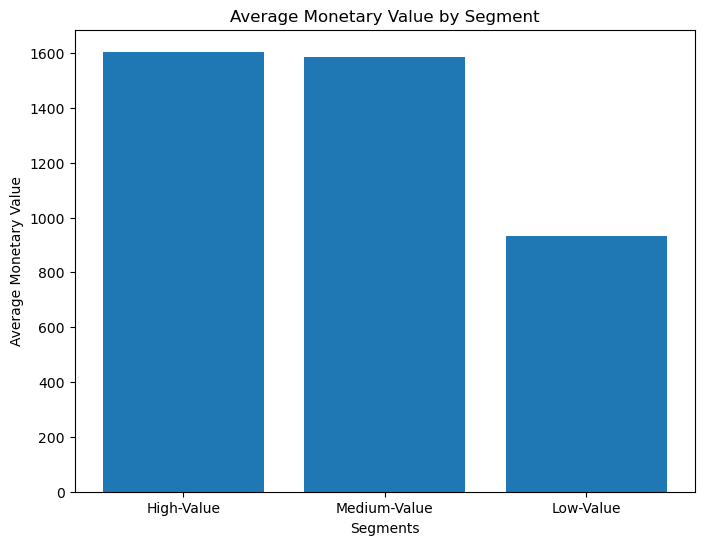

In [65]:
average_monetary = rfm_data.groupby('Segment')['Monetary'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
plt.bar(average_monetary.index, average_monetary.values)
plt.xlabel('Segments')
plt.ylabel('Average Monetary Value')
plt.title('Average Monetary Value by Segment')
plt.show()

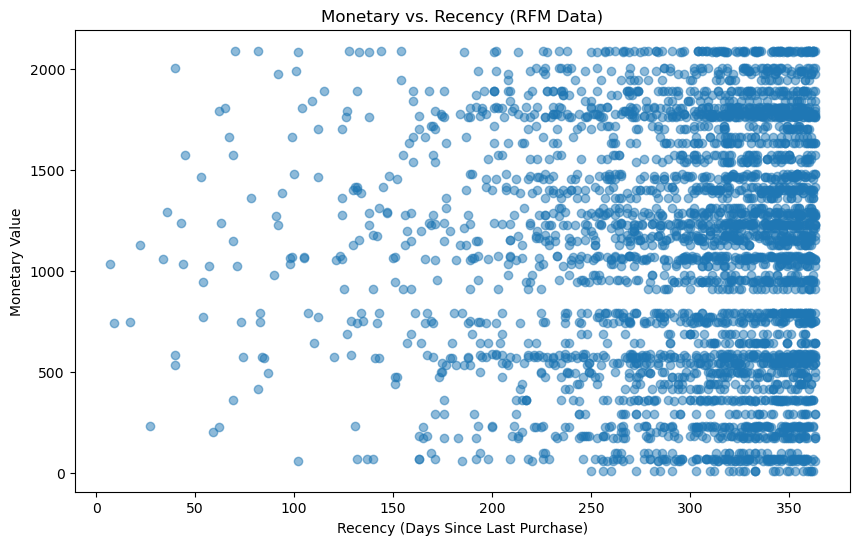

In [66]:
# Sort the data by recency in ascending order
rfm_data_sorted = rfm_data.sort_values(by='Recency')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rfm_data_sorted['Recency'], rfm_data_sorted['Monetary'], alpha=0.5)
plt.title('Monetary vs. Recency (RFM Data)')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Monetary Value')
plt.show()

In [67]:
import datetime as dt

# Assuming 'recency' is a column in your RFM data representing the transaction date
# Convert the transaction date to datetime if it's not already
rfm_data['transaction_date'] = pd.to_datetime(rfm_data['transaction_date'])

# Calculate recency as the number of days since January 2018
today = pd.to_datetime('January 1, 2018')
rfm_data['Recency'] = (today - rfm_data['transaction_date']).dt.days

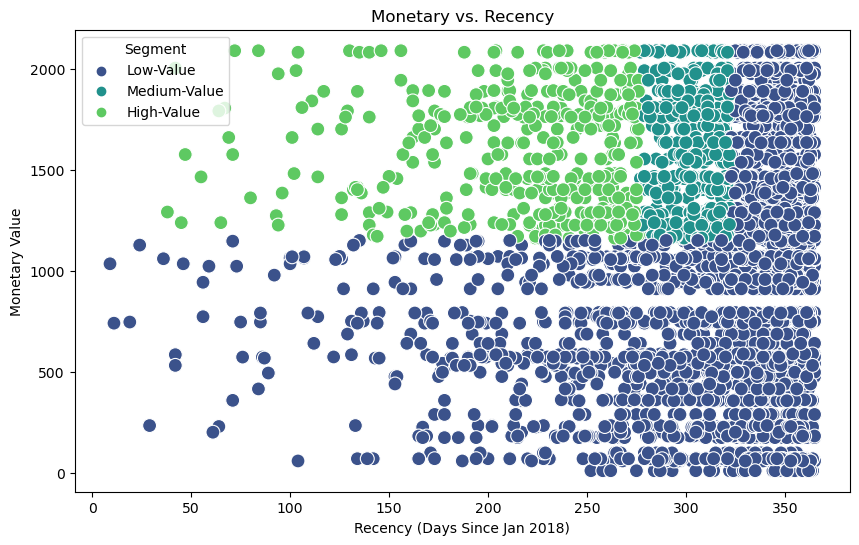

In [68]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_data, x='Recency', y='Monetary', hue='Segment', palette='viridis', s=100)
plt.title('Monetary vs. Recency')
plt.xlabel('Recency (Days Since Jan 2018)')
plt.ylabel('Monetary Value')
plt.show()

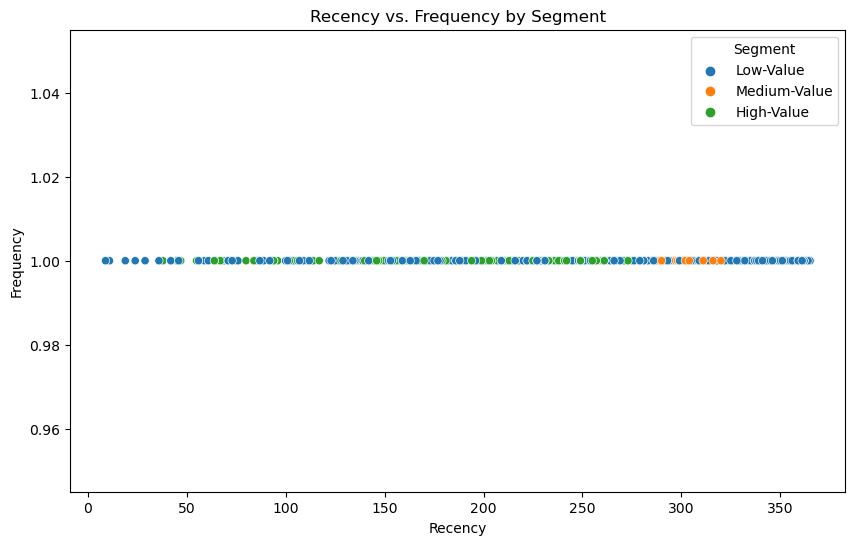

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Segment', data=rfm_data)
plt.title('Recency vs. Frequency by Segment')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Segment')
plt.show()

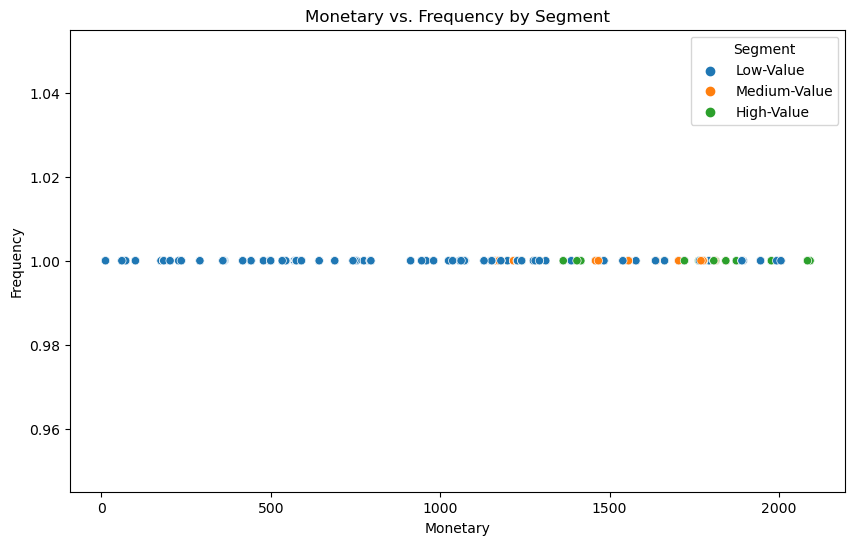

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Monetary', y='Frequency', hue='Segment', data=rfm_data)
plt.title('Monetary vs. Frequency by Segment')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.legend(title='Segment')
plt.show()

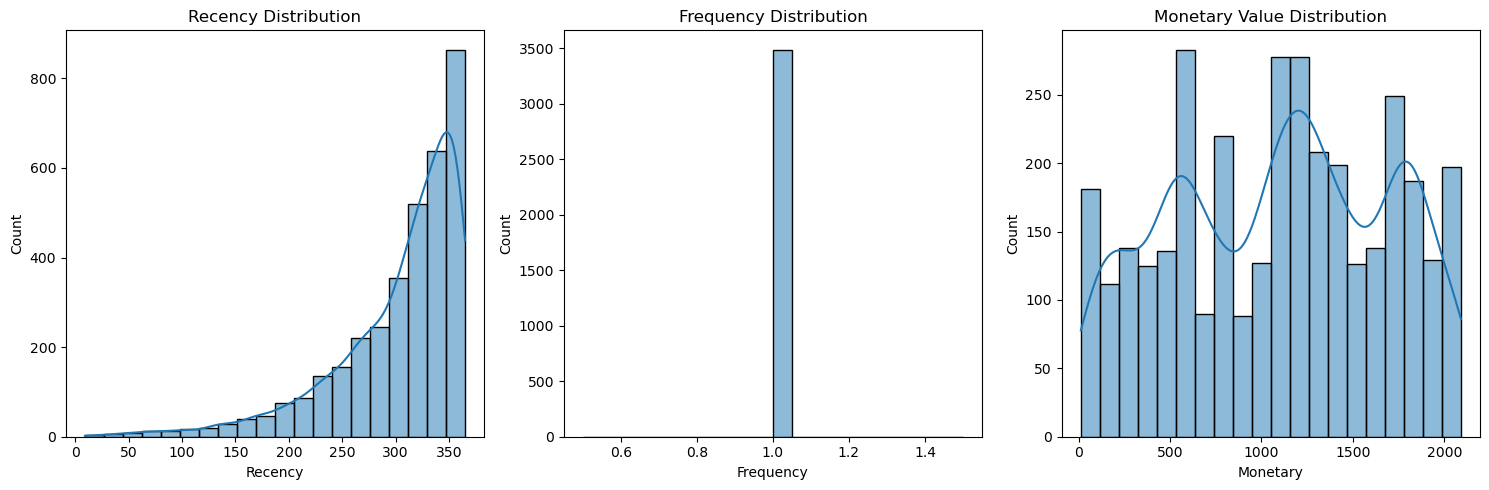

In [71]:
# Histograms for Recency, Frequency, and Monetary Value
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.histplot(rfm_data['Recency'], bins=20, kde=True)
plt.title('Recency Distribution')

plt.subplot(132)
sns.histplot(rfm_data['Frequency'], bins=20, kde=True)
plt.title('Frequency Distribution')

plt.subplot(133)
sns.histplot(rfm_data['Monetary'], bins=20, kde=True)
plt.title('Monetary Value Distribution')

plt.tight_layout()
plt.show()

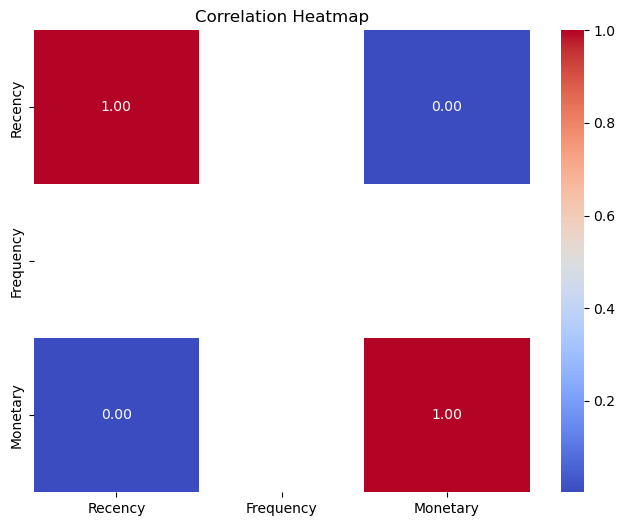

In [72]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_data[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

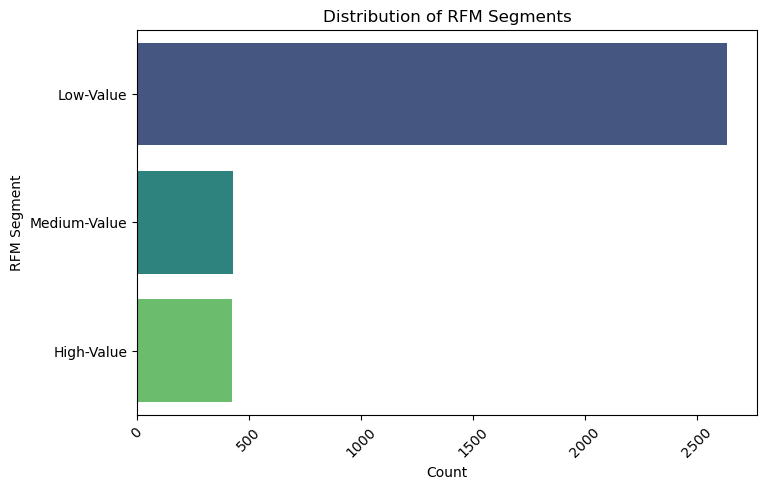

In [73]:
# RFM Segments
segment_counts = rfm_data['Segment'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(y=segment_counts.index, x=segment_counts.values, palette='viridis')
plt.title('Distribution of RFM Segments')
plt.ylabel('RFM Segment')
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.show()

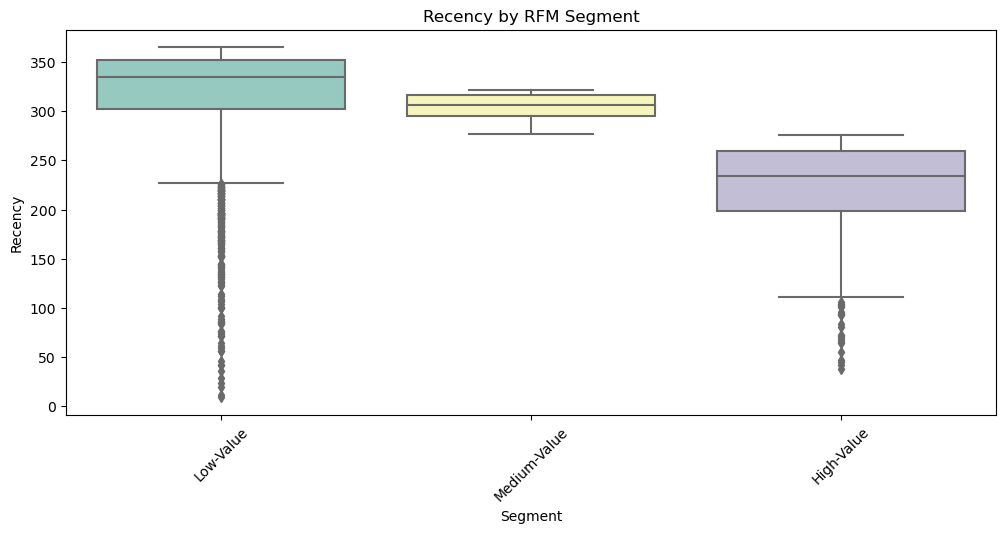

In [74]:
# Box Plots for Recency, Frequency, and Monetary Value by Segment
plt.figure(figsize=(12, 5))
sns.boxplot(data=rfm_data, x='Segment', y='Recency', palette='Set3')
plt.title('Recency by RFM Segment')
plt.ylabel('Recency')
plt.xticks(rotation=45)
plt.show()

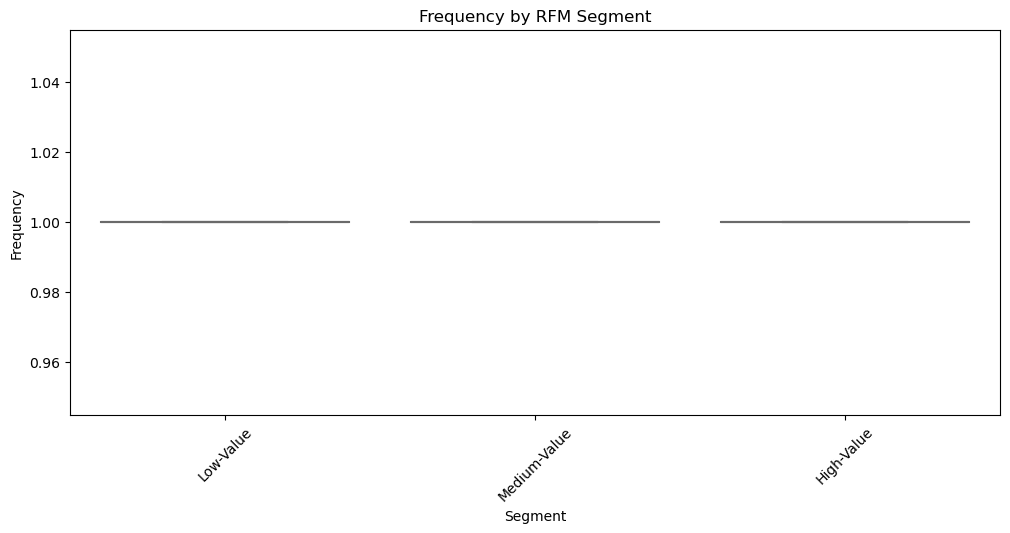

In [75]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=rfm_data, x='Segment', y='Frequency', palette='Set3')
plt.title('Frequency by RFM Segment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

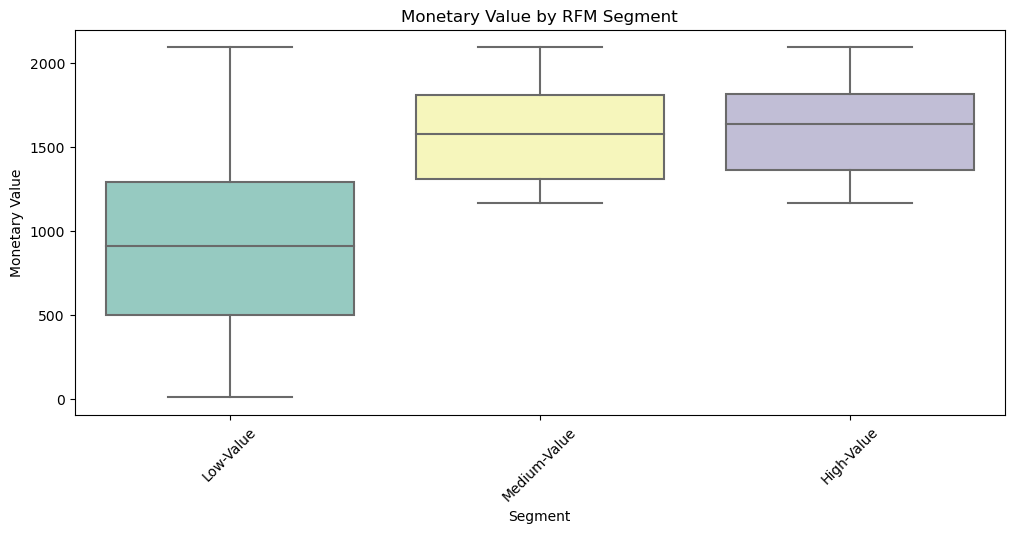

In [76]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=rfm_data, x='Segment', y='Monetary', palette='Set3')
plt.title('Monetary Value by RFM Segment')
plt.ylabel('Monetary Value')
plt.xticks(rotation=45)
plt.show()

In [77]:
# Assuming 'rfm_data' is your DataFrame with RFM segments

# Define a mapping from segments to customer titles
segment_to_title = {
    'Platinum': 'Platinum Customer',
    'Gold': 'Gold Customer',
    'Silver': 'Silver Customer',
    'Bronze': 'Bronze Customer',
    'Lost': 'Lost Customer'
}

# Create a new column 'Customer_Title' by mapping 'Segment' to titles
rfm_data['Customer_Title'] = rfm_data['Segment'].map(segment_to_title)

In [78]:
rfm_data

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,age_group,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Customer_Title
0,720,Darrel,Canet,M,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,...,70+,363,1,574.64,1,1,1,111,Low-Value,NaN
1,1092,Katlin,Creddon,F,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,...,70+,350,1,499.53,1,1,1,111,Low-Value,NaN
2,3410,Merrili,Brittin,F,93,1940-09-22,NaN,Property,Mass Customer,N,...,70+,334,1,586.45,2,1,2,212,Low-Value,NaN
3,2413,Abbey,Murrow,M,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,...,70+,287,1,1289.85,3,1,3,313,Medium-Value,NaN
4,658,Donn,Bonnell,M,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,...,70+,360,1,1129.13,1,1,2,112,Low-Value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,3312,Franky,Nanninini,Unknown,49,NaT,Administrative Officer,IT,High Net Worth,N,...,NaN,341,1,235.63,2,1,1,211,Low-Value,NaN
3485,3322,Hew,Sworder,Unknown,24,NaT,Financial Analyst,Financial Services,Affluent Customer,N,...,NaN,345,1,1179.00,2,1,3,213,Low-Value,NaN
3486,3343,Cristabel,Bim,Unknown,3,NaT,Recruiter,IT,Mass Customer,N,...,NaN,346,1,688.63,2,1,2,212,Low-Value,NaN
3487,3365,Karlens,Chaffyn,Unknown,29,NaT,Engineer III,IT,Mass Customer,N,...,NaN,361,1,795.34,1,1,2,112,Low-Value,NaN


In [79]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3489 non-null   int64         
 1   first_name                           3489 non-null   object        
 2   last_name                            3377 non-null   object        
 3   gender                               3489 non-null   object        
 4   past_3_years_bike_related_purchases  3489 non-null   int64         
 5   DOB                                  3413 non-null   datetime64[ns]
 6   job_title                            3068 non-null   object        
 7   job_industry_category                2929 non-null   object        
 8   wealth_segment                       3489 non-null   object        
 9   deceased_indicator                   3489 non-null   object        
 10  owns_car    

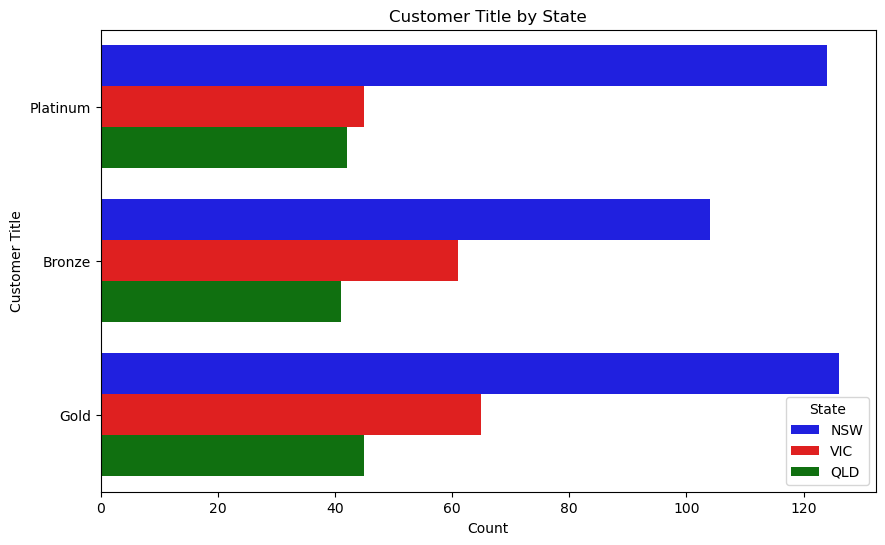

In [80]:
# Create a dictionary to map RFM Score to Customer Title
rfm_score_to_title = {
    '111': 'Platinum',
    '311': 'Gold',
    '413': 'Bronze'
}

# Map RFM Score to Customer Title
rfm_data['Customer_Title'] = rfm_data['RFM_Score'].map(rfm_score_to_title)

# Create horizontal bar plot segmented by state
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm_data, y='Customer_Title', hue='state', palette=['blue', 'red', 'green'])
plt.title('Customer Title by State')
plt.xlabel('Count')
plt.ylabel('Customer Title')
plt.legend(title='State')
plt.show()

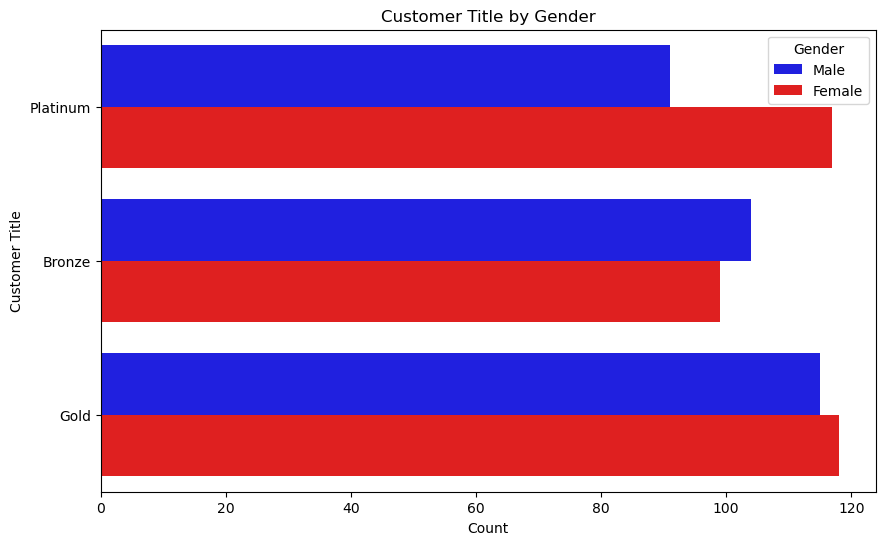

In [81]:
# Map 'M' to 'Male' and 'F' to 'Female' in the 'gender' column
rfm_data['gender'] = rfm_data['gender'].map({'M': 'Male', 'F': 'Female'})

# Now you can create the gender visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm_data, y='Customer_Title', hue='gender', palette={'Male': 'blue', 'Female': 'red'})
plt.title('Customer Title by Gender')
plt.xlabel('Count')
plt.ylabel('Customer Title')
plt.legend(title='Gender')
plt.show()

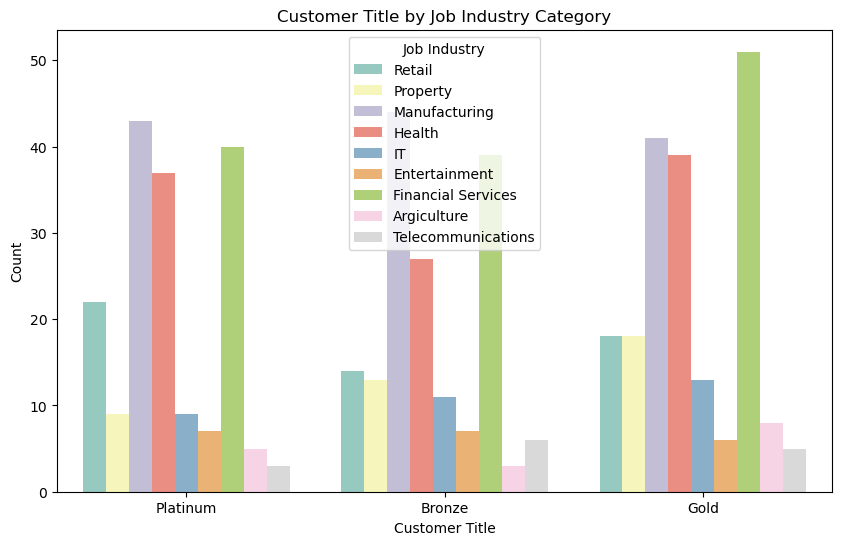

In [82]:
# Create horizontal bar plot segmented by job industry category
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm_data, x='Customer_Title', hue='job_industry_category', palette='Set3')
plt.title('Customer Title by Job Industry Category')
plt.ylabel('Count')
plt.xlabel('Customer Title')
plt.legend(title='Job Industry')
plt.show()